<center>

---
# Naive Bayes
---
</center>


Los clasificadores ingenuos de Bayes son una familia de clasificadores probabilísticos que se basan en la aplicación del teorema de Bayes con suposiciones ingenuas sobre la independencia entre las características.

Estos clasificadores son extremadamente rápidos tanto en entrenamiento como en predicción, y también son altamente escalables e interpretables. A pesar de sus suposiciones demasiado simplificadas, a menudo funcionan bien en problemas complejos del mundo real, especialmente en tareas de clasificación de texto como el filtrado de spam y el análisis de sentimientos, donde su suposición ingenua se cumple en gran medida.

Naive Bayes es también uno de los primeros modelos generativos (mucho antes de ChatGPT…), que aprende la distribución de las entradas en cada clase. Estos modelos se pueden usar no solo para la predicción sino también para generar nuevas muestras.


Antecedentes: el teorema de Bayes
El teorema de Bayes (o regla de Bayes) es un teorema importante en probabilidad que nos permite calcular la probabilidad condicional de un evento, con base en el conocimiento previo de las condiciones relacionadas con ese evento.

Matemáticamente, el teorema establece que para cualesquiera eventos $A$ y $B$

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

- $P ( A | B )$ es la probabilidad posterior de A dado B , es decir, la probabilidad de que ocurra el evento A dado que B ha ocurrido.
- $P ( B | A )$ es la probabilidad de que B dado A , es decir, la probabilidad de que ocurra el evento B dado que A ha ocurrido.
- $P ( A )$ es la probabilidad previa de A , es decir, la probabilidad de A sin condiciones previas.
- $P ( B )$ es la probabilidad marginal de B , es decir, la probabilidad de B sin condiciones previas.

El **teorema de Bayes** es particularmente útil para inferir causas a partir de sus efectos, ya que a menudo es más fácil discernir la probabilidad de un efecto dada la presencia o ausencia de su causa, que al revés. Por ejemplo, es mucho más fácil estimar la probabilidad de que un paciente con meningitis sufra dolor de cabeza, que al revés (ya que muchas otras enfermedades pueden causar dolor de cabeza). En tales casos, podemos aplicar la regla de Bayes de la siguiente manera:

$$
P(\text { causa } \mid \text { efecto })=\frac{P(\text { efecto } \mid \text { causa }) P(\text { causa })}{P(\text { efecto })}
$$

**Ejemplo**

Se sabe que aproximadamente el 25% de los pacientes con cáncer de pulmón sufren dolor en el pecho. Supongamos que la tasa de incidencia de cáncer de pulmón es de 50 por 100.000 personas y la tasa de incidencia de dolor en el pecho es de 1.500 por 100.000 personas en todo el mundo. ¿Cuál es la probabilidad de que un paciente con dolor en el pecho tenga cáncer de pulmón?



**El modelo ingenuo de Bayes**

Los modelos Naive Bayes son clasificadores probabilísticos , es decir, no sólo asignan una etiqueta de clase a una muestra determinada, sino que también proporcionan una estimación de la probabilidad de que pertenezca a esa clase. Por ejemplo, un modelo Naive Bayes puede predecir que un correo electrónico determinado tiene un 80% de posibilidades de ser spam y un 20% de posibilidades de ser un aficionado.

### Clasificador Naive Bayes
El clasificador que veremos a continuación se basa en un resultado estadístico muy simple pero poderoso: ¡el teorema de Bayes! Antes de profundizar en el clasificador, necesitaremos algunas nociones muy básicas de probabilidades condicionales. Sin embargo, la idea de cómo funciona el clasificador es muy simple:
> Dado un individuo con ciertas características, usaremos el teorema de Bayes y los datos observados para estimar la probabilidad de que pertenezca a una clase u otra. La mayor de estas dos probabilidades determinaría cómo clasificamos el individuo.

### Teorema de Bayes

De acuerdo al teorema de Bayes, la probabilidad que un indiviudo pertenezca a determinada clase $y$ dadas las covariables (características) $\mathbf X$ es:

$$\hat p(y| \mathbf X) = \frac{p(y \cap \mathbf X)}{p(\mathbf X)} = \frac{p(\mathbf X | y) p(y)}{p(\mathbf X)}$$

Estimar $p(y)$ es fácil, simplemente calculamos la proporción de individuos que pertenecen a la clase $y$.

**Ejercicio**: Explique por qué estimar $p(\mathbf X | y)$ no es sencillo.



### Suposición ingenua (naive)

Dado que estimar $p(\mathbf X|y)$ no es fácil. Se procede a suponer que **las características $\mathbf X$ son independientes de la clase $y$**. Es decir:


>$$
\begin{aligned}
    p(\mathbf X | y) & = p(x_1 | y) \ p(x_2 | y, x_1) \ p(x_3 | y, x_1, x_2) \ ... \ p(x_p | y, x_1,...,x_{n-1}) & \text{Regla de la multipliacion}
    \\
    \\
    & = p(x_1|y) \ p(x_2|y) \ ... \ p(x_n | y) & \text{Independencia condicional}
    \\
    \\
    & = \prod_{i = 1}^n p(x_i | y) & \text{Notación compacta}
\end{aligned}
$$

Ahora como se quiere estimar la clase a la cual pertenece el individuo con características $\mathbf X$, se toma la mayor probabilidad

$$
\begin{aligned}
    h(\mathbf X) & = \mathrm {max\ } p(y | \mathbf X)
    \\
    & = \mathrm {max\ } \frac{p(\mathbf X | y) p(y)}{p(\mathbf X)}
    \\
    & = \mathrm {max\ } p(\mathbf X | y) p(y) & \text{$P(\mathbf X)$ no depende de $y$}
    \\
    & = \mathrm {max\ } \prod_{i = 1}^n p(x_i | y) p(y) & \text{Supuesto naive}
    \\
    & = \mathrm {max\ } \sum_{i = 1}^n \log(p(x_i| y)) + \log p(y) &\text{Log es monotona}
\end{aligned}
$$

### Calculo de $p(x_i|y)$

Ahora solo nos queda por calcular $p(x_i|y)$. Para esto se realizan el supuesto de normalidad.

$$p(x_i | y = c)  \sim \mathcal{N}(\mu_{i c}, \sigma^2_{i c}) = \phi(x | \mu_{i c}, \sigma^2_{i c} )$$

Donde,

$$\mu_{i c} = \frac{1}{m_c} \sum_{j = 1}^m \mathcal{I}(y^{(j)} = c) x^{(j)}_i$$

$$\sigma^2_{i c} = \frac{1}{m_c} \sum_{j = 1}^m \mathcal{I}(y^{(j)} = c) (x^{(j)}_i - \mu_{i c})^2$$

$$m_c = \sum_{i = 1}^m \mathcal{I}(y^{(j)} = c)$$

$$p(y = c) = \frac{1}{m} \sum_{j = 1}^m \mathcal{I}(y^{(j)} = c)$$

con $\mathcal{I(s)}$ una función que toma el valor de 1 si se cumple la condición $s$.

## Ventajas

- Es fácil y rápido predecir la clase de conjunto de datos de prueba.  
- También funciona bien en la predicción multiclase.
- Cuando se mantiene la suposición de independencia, un clasificador Naive Bayes funciona mejor en comparación con otros modelos como la Regresión Logística y se necesitan menos datos de entrenamiento.
- Funciona bien en el caso de variables de entrada categóricas comparada con variables numéricas.


## Desventajas

- Si la variable categórica tiene una categoría en el conjunto de datos de prueba, que no se observó en el conjunto de datos de entrenamiento, el modelo asignará una probabilidad de 0 y no podrá hacer una predicción.

- Otra limitación de Naive Bayes es la asunción de predictores independientes. En la vida real, es casi imposible que obtengamos un conjunto de predictores que sean completamente independientes.


## Implementando Naive Bayes

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

### Se cargan los datos
Para este ejemplo, trabajaremos con los datos `iris`



lo primero que haremos es cargar los datos

In [2]:
# Se cargan los datos
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})



- Se realiza el gráfico sepal length vs sepal width

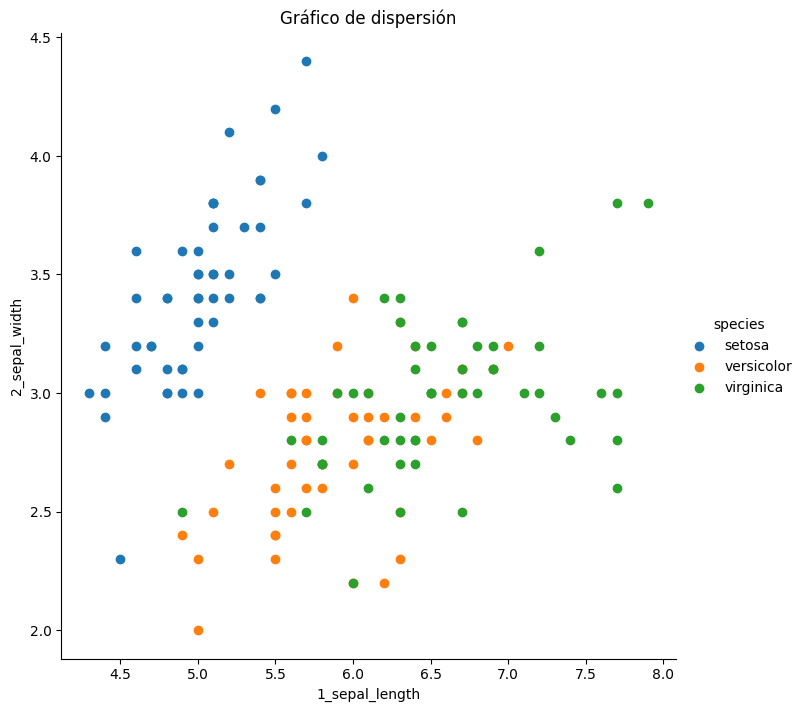

In [5]:
sns.FacetGrid(iris, hue="species", height=7)\
    .map(plt.scatter,"1_sepal_length", "2_sepal_width", )\
    .add_legend()
plt.title('Gráfico de dispersión')
plt.show()

Se toman las características de la base datos y las etiquetas

In [6]:
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2})

C:\Users\wsand\AppData\Local\Temp\ipykernel_1976\2028649217.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2})


In [7]:
y_labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

Se crea el modelo Naive Bayes y ajusta el modelo

In [8]:
from sklearn.naive_bayes import GaussianNB

model_sk = GaussianNB()
model_sk.fit(X_data, y_labels)

GaussianNB()

In [9]:
model_sk.predict([[7.5, 2.5],
                  [5, 3.5]])

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([2, 0], dtype=int64)

Se grafica

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with f

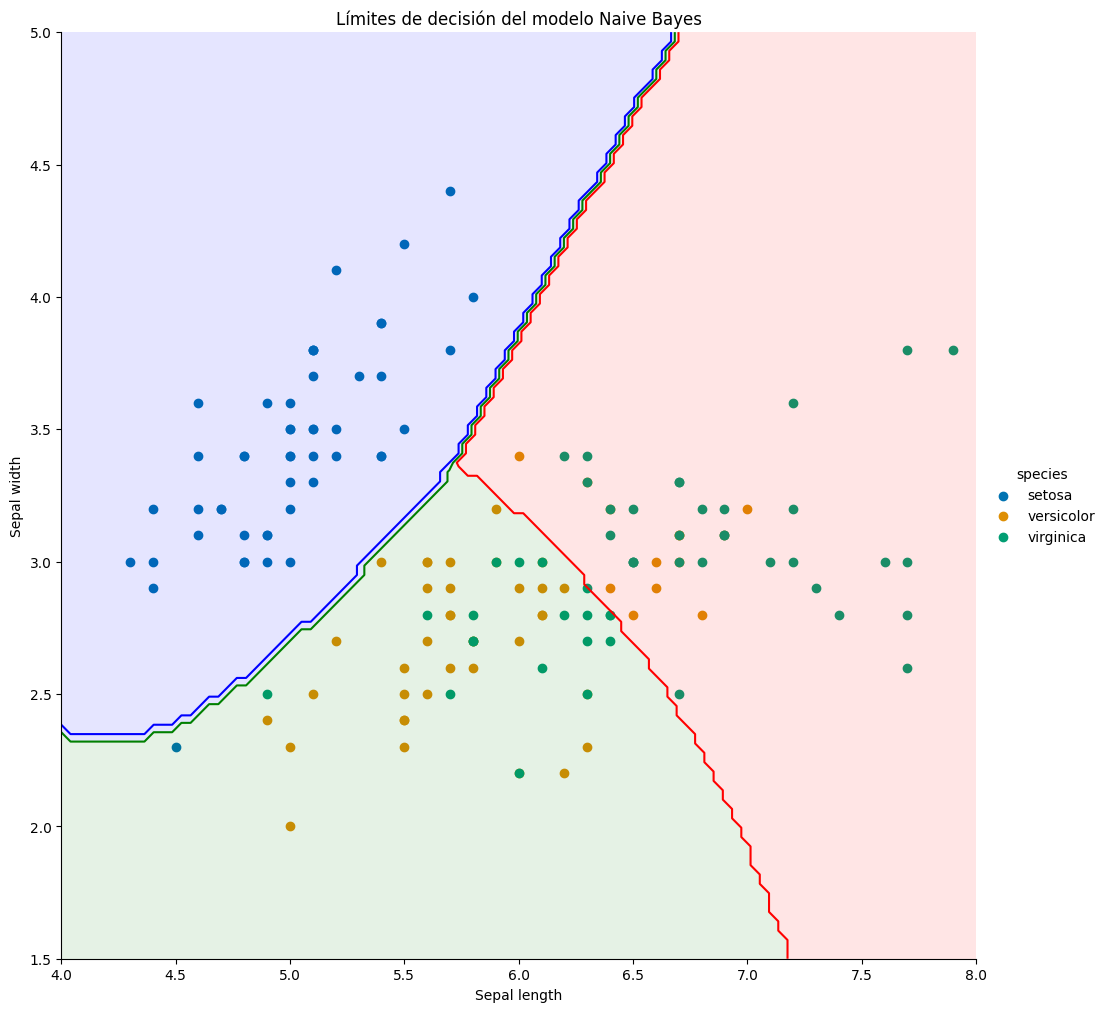

In [10]:
# Se realiza una grilla de 100 puntos
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind')\
    .map(plt.scatter, "1_sepal_length", "2_sepal_width",)\
    .add_legend()

my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Límites de decisión del modelo Naive Bayes')

plt.show()

In [11]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


Ahora, vamos a clasificar incorporando las 4 variables

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


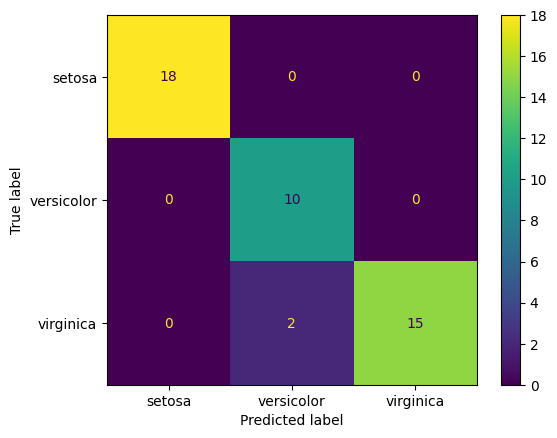

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Paso 1: Selección y configuración del modelo
model2 = GaussianNB()

# Paso 2: Selección de variables
X = iris[['1_sepal_length', '2_sepal_width', '3_petal_length', '4_petal_width']]
y = iris['species']

# Paso 2b: Partición de base de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123 )

# Paso 3. Ajuste de modelo
model2.fit(X_train, y_train)

# Paso 4: Pronostico de modelo
model2.predict([[4.3,	2.1, 1.8, 0.3]])

# Paso 5: Evaluación de modelo
y_pred = model2.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model2.classes_)
disp.plot()

plt.show()


#plot_confusion_matrix(model2, X_test, y_test)